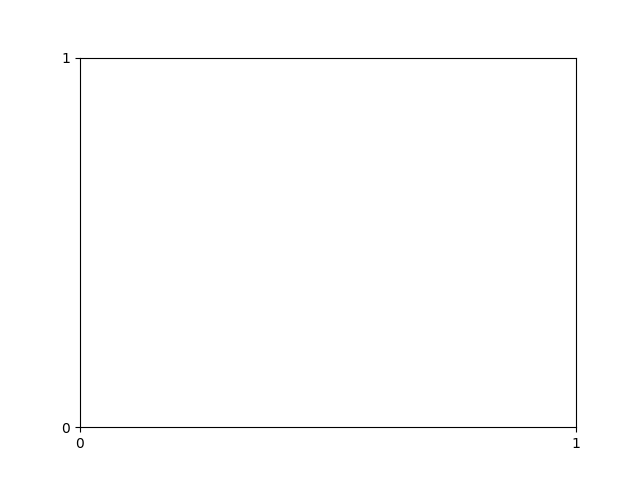

In [1]:
%matplotlib widget

PORT = '/dev/ttyACM1'
BAUD = 115200

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from importlib import reload # for debugging

import glitch_utils
from glitch_utils import GlitchResult
glitch_utils = reload(glitch_utils)

try:
	del glitcher
	del gc
except:
	pass
glitcher = glitch_utils.GlitchyMcGlitchFace(PORT, BAUD)
gc = glitch_utils.GlitchController(groups=[r.name for r in GlitchResult], parameters=['ext_offset', 'width'])
gc.set_range('ext_offset', 1, 10)
gc.set_range('width', 1, 10)

# NOTE This figure must be generated in a different cell than the one that calls the plot function
#	   Otherwise the plot will not be displayed until the cell is done executing (no live plot)
fig, ax = plt.subplots()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

In [5]:
res = {
b'\x50': 'P_CMD_RESULT_RESET',
b'\x51': 'P_CMD_RESULT_ALIVE',
b'\x52': 'P_CMD_RESULT_DEAD',
b'\x53': 'P_CMD_RESULT_ZOMBIE',
b'\x54': 'P_CMD_RESULT_DATA_TIMEOUT',
b'\x55': 'P_CMD_RESULT_UNREACHABLE',
b'\x56': 'P_CMD_RESULT_UNCONNECTABLE',
b'\x57': 'P_CMD_RESULT_UNTRIGGERED',
b'\x58': 'P_CMD_RESULT_PMIC_FAIL',
}

for glitch_setting in gc.rand_glitch_values():
	read_result, read_data = glitcher.glitch_mul(glitch_setting, expected=0x1337)
	gc.add_result(glitch_setting, read_result)
	if read_result == GlitchResult.SUCCESS:
		print(f'Got success data: 0x{read_data.hex()}')
	if read_result == GlitchResult.WEIRD:
		print(f'Got weird response: 0x{read_data.hex()}')
	if read_result == GlitchResult.BROKEN:
		print(f'The target is behaving in a strange way: 0x{read_data.hex()}')
		print(f'\t{res[read_data]}')
	ax.plot(*glitch_setting, glitch_utils.result_to_marker(read_result))
	fig.canvas.draw() # Guarantees live update of the plot whenever a new point is added

The target is behaving in a strange way: 0x58
The target is behaving in a strange way: 0x58
The target is behaving in a strange way: 0x58
The target is behaving in a strange way: 0x58
The target is behaving in a strange way: 0x58
The target is behaving in a strange way: 0x58
The target is behaving in a strange way: 0x58
The target is behaving in a strange way: 0x58
The target is behaving in a strange way: 0x58
The target is behaving in a strange way: 0x58
The target is behaving in a strange way: 0x58
The target is behaving in a strange way: 0x58
The target is behaving in a strange way: 0x58
The target is behaving in a strange way: 0x58
The target is behaving in a strange way: 0x58
The target is behaving in a strange way: 0x58
The target is behaving in a strange way: 0x58
The target is behaving in a strange way: 0x58
The target is behaving in a strange way: 0x58
The target is behaving in a strange way: 0x58
The target is behaving in a strange way: 0x58
The target is behaving in a strang

KeyboardInterrupt: 